In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 13 02:22:51 2021

@author: AMILA
"""

import pandas as pd # import library
import numpy as np # import lib
import statistics as st
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from numpy import linalg as LA
from sklearn import metrics

df=pd.read_csv(r'/home/tharaka/kagglecompetition/data-storm-20/Hotel-A-train.csv' )
dfval = pd.read_csv(r'/home/tharaka/kagglecompetition/data-storm-20/Hotel-A-validation.csv')
# train set

df['Expected_checkin'] = pd.to_datetime(df['Expected_checkin'],infer_datetime_format=True)
df['Expected_checkout'] = pd.to_datetime(df['Expected_checkout'],infer_datetime_format=True)
df['Booking_date'] = pd.to_datetime(df['Booking_date'],infer_datetime_format=True)

df['Days'] = df['Expected_checkout']-df['Booking_date']
#df['Months'] = df.Expected_checkin.dt.month
df['Days'] = df.Days.dt.days

#dfdf2=df.
#df5['New']=df['Reservation-id']
df = df.drop(['Reservation-id','Expected_checkin','Expected_checkout','Booking_date'],axis=1)

df.loc[df['Adults']==1,'Adults']=0
df.loc[df['Adults']==2,'Adults']=1
df.loc[df['Adults']==3,'Adults']=2
df.loc[(df['Adults']==4)|(df['Adults']==5) ,'Adults']=3

df.loc[df['Babies']==0,'Babies']=0
df.loc[(df['Babies']==1)|(df['Babies']==2) ,'Babies']=1

df.loc[(df['Age']>=18) &(df['Age']<=30),'Age']=0
df.loc[(df['Age']>=31) &(df['Age']<=44),'Age']=1
df.loc[(df['Age']>=45) &(df['Age']<=57),'Age']=2
df.loc[df['Age']>=58,'Age']=3

df.loc[df['Children']==1,'Children']='c1'
df.loc[df['Children']==2,'Children']='c2'
df.loc[df['Children']==3,'Children']='c3'

#df.loc[(df['Months']>=1) &(df['Months']<=3),'Months']=1
#df.loc[(df['Months']>=4) &(df['Months']<=7),'Months']=2
#df.loc[df['Months']>=8,'Months']=3


df.loc[(df['Room_Rate']>=100) &(df['Room_Rate']<=140),'Room_Rate']=0
df.loc[(df['Room_Rate']>=141) &(df['Room_Rate']<=180),'Room_Rate']=1
df.loc[(df['Room_Rate']>=181) &(df['Room_Rate']<=220),'Room_Rate']=2
df.loc[df['Room_Rate']>=221,'Room_Rate']=3

df.loc[df['Deposit_type']=='No Deposit','Deposit_type']=0
df.loc[df['Deposit_type']=='Refundable','Deposit_type']=1
df.loc[df['Deposit_type']=='Non-Refundable','Deposit_type']=2

money = ['Deposit_type', 'Room_Rate']
df["Money"] = df[money].sum(axis=1)

dfnew=df.drop(['Gender','Ethnicity','Educational_Level','Adults','Babies','Income','Country_region','Visted_Previously','Deposit_type','Booking_channel','Required_Car_Parking','Reservation_Status','Discount_Rate','Hotel_Type','Room_Rate'],axis=1)


# Validation set
dfval['Expected_checkin'] = pd.to_datetime(dfval['Expected_checkin'],infer_datetime_format=True)
dfval['Expected_checkout'] = pd.to_datetime(dfval['Expected_checkout'],infer_datetime_format=True)
dfval['Booking_date'] = pd.to_datetime(dfval['Booking_date'],infer_datetime_format=True)

dfval['Days'] = dfval['Expected_checkout']-dfval['Booking_date']
#dfval['Months'] = dfval.Expected_checkin.dt.month
dfval = dfval.drop(['Reservation-id','Gender','Expected_checkin','Expected_checkout','Booking_date'],axis=1)


dfval.loc[dfval['Adults']==1,'Adults']=0
dfval.loc[dfval['Adults']==2,'Adults']=1
dfval.loc[dfval['Adults']==3,'Adults']=2
dfval.loc[(dfval['Adults']==4)|(dfval['Adults']==5) ,'Adults']=3

dfval.loc[dfval['Babies']==0,'Babies']=0
dfval.loc[(dfval['Babies']==1) | (dfval['Babies']==2) ,'Babies']=1

dfval.loc[(dfval['Age']>=18) &(dfval['Age']<=30),'Age']=0
dfval.loc[(dfval['Age']>=31) &(dfval['Age']<=44),'Age']=1
dfval.loc[(dfval['Age']>=45) &(dfval['Age']<=57),'Age']=2
dfval.loc[dfval['Age']>=58,'Age']=4

dfval.loc[dfval['Deposit_type']=='No Deposit','Deposit_type']=0
dfval.loc[dfval['Deposit_type']=='Refundable','Deposit_type']=1
dfval.loc[dfval['Deposit_type']=='Non-Refundable','Deposit_type']=2

dfval.loc[(dfval['Room_Rate']>=100) &(dfval['Room_Rate']<=140),'Room_Rate']=0
dfval.loc[(dfval['Room_Rate']>=141) &(dfval['Room_Rate']<=180),'Room_Rate']=1
dfval.loc[(dfval['Room_Rate']>=181) &(dfval['Room_Rate']<=220),'Room_Rate']=2
dfval.loc[dfval['Room_Rate']>=221,'Room_Rate']=3


#dfval.loc[(dfval['Months']>=1) &(dfval['Months']<=3),'Months']=1
#dfval.loc[(dfval['Months']>=4) &(dfval['Months']<=7),'Months']=2
#dfval.loc[dfval['Months']>=8,'Months']=3

dfval.loc[dfval['Children']==1,'Children']='c1'
dfval.loc[dfval['Children']==2,'Children']='c2'
dfval.loc[dfval['Children']==3,'Children']='c3'
dfval['Days'] = dfval.Days.dt.days

money = ['Deposit_type', 'Room_Rate']
dfval["Money"] = dfval[money].sum(axis=1)
dfnewval=dfval.drop(['Ethnicity','Educational_Level','Income','Adults','Babies','Country_region','Hotel_Type','Reservation_Status','Visted_Previously','Deposit_type','Booking_channel','Required_Car_Parking','Discount_Rate','Room_Rate'],axis=1)
#df['Days'] = df.Arrival_duration.dt.days #####

# Train
X_train = dfnew.copy()
y_train = df.pop('Reservation_Status')
X_valid = dfnewval.copy()
y_valid = dfval.pop('Reservation_Status')

s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

from sklearn.preprocessing import OneHotEncoder
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import AdaBoostClassifier
#model=DecisionTreeClassifier(criterion='entropy',max_depth=1)
#AdaBoost=AdaBoostClassifier(base_estimator=model,n_estimators=400,learning_rate=0.5)

#boostmodel=model.fit(OH_X_train,y_train)
#y_pred=boostmodel.predict(OH_X_valid)
#print(metrics.accuracy_score(y_valid, y_pred))

#from sklearn.svm import SVC
#svclassifier = SVC(kernel='linear')
#svclassifier.fit(OH_X_train, y_train) 

#y_pred = svclassifier.predict(OH_X_valid)

#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_valid,y_pred))
#print(classification_report(y_valid,y_pred))       
#from sklearn.metrics import accuracy_score

#print(accuracy_score(y_valid, y_pred))   
#from sklearn.metrics import f1_score
#print(f1_score(y_valid, y_pred, average='macro'))

#from sklearn.ensemble import RandomForestClassifier

#def run_randomForest(OH_X_train, OH_X_valid, y_train, y_valid):
    #clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
    #clf.fit(OH_X_train, y_train)
   # y_pred = clf.predict(OH_X_valid)
  #  print('Accuracy on test set: ')
 #   print(accuracy_score(y_valid, y_pred))

#run_randomForest(OH_X_train, OH_X_valid, y_train, y_valid)   

from sklearn.preprocessing import StandardScaler 
# create the scaler 
ss = StandardScaler() 
# apply the scaler to the dataframe subset 
subset_scaled = ss.fit_transform(OH_X_train)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(leaf_size=2,n_neighbors =1,p=10) 
model=knn.fit(OH_X_train, y_train)
y_pred=model.predict(OH_X_valid)
print(knn.score(OH_X_valid, y_valid))

#df5=pd.DataFrame(y_pred)

#df5.loc[df5['0']=='No-Show','Reservation_Status']=3
#df5.loc[df5['0']=='Check-In','Reservation_Status']=1
#df5.loc[df5['0']=='Canceled','Reservation_Status']=2

#df5.to_csv('test-results-submission.csv')
#from sklearn.model_selection import cross_val_score
# Creating odd list K for KNN
#neighbors = list(range(1,50,2))
# empty list that will hold cv scores
#cv_scores = [ ]
#perform 10-fold cross-validation
#for K in neighbors:
   # knn = KNeighborsClassifier(n_neighbors = K)
  #  scores = cross_val_score(knn,OH_X_train,y_train,cv = 10,scoring ="accuracy")
 #   cv_scores.append(scores.mean())
# Changing to mis classification error
#mse = [1-x for x in cv_scores]
# determing best k
#optimal_k = neighbors[mse.index(min(mse))]
#print("The optimal no. of neighbors is {}".format(optimal_k))
#from sklearn.ensemble import AdaBoostClassifier#List Hyperparameters that we want to tune.
#AdaBoost=AdaBoostClassifier(base_estimator=model,n_estimators=100,learning_rate=1)
#boostmodel=AdaBoost.fit(OH_X_train,y_train)
#y_pred=boostmodel.predict(OH_X_valid)
#print(metrics.accuracy_score(y_valid, y_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid,y_pred))
print(classification_report(y_valid,y_pred)) 

from sklearn.metrics import f1_score
print(f1_score(y_valid, y_pred, average='macro'))

from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
#leaf_size = list(range(1,50))
#n_neighbors = list(range(1,50))
#p=[1,2]
#Convert to dictionary
#hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
#knn_2 = KNeighborsClassifier()
#Use GridSearch
#clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
#best_model = clf.fit(OH_X_train,y_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])




Categorical variables:
['Children', 'Meal_Type', 'Previous_Cancellations', 'Use_Promotion']
Categorical variables:
['Children', 'Meal_Type', 'Previous_Cancellations', 'Use_Promotion']
0.4961804292469989
[[ 152  531   58]
 [ 300 1168  142]
 [  80  274   44]]
              precision    recall  f1-score   support

    Canceled       0.29      0.21      0.24       741
    Check-In       0.59      0.73      0.65      1610
     No-Show       0.18      0.11      0.14       398

    accuracy                           0.50      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.45      0.50      0.47      2749

0.34261508204497854


In [2]:
df_test1=pd.read_csv(r'/home/tharaka/kagglecompetition/data-storm-20/Hotel-A-test.csv' )

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     27499 non-null  int64  
 1   Children                27499 non-null  object 
 2   Meal_Type               27499 non-null  object 
 3   Previous_Cancellations  27499 non-null  object 
 4   Use_Promotion           27499 non-null  object 
 5   Days                    27499 non-null  int64  
 6   Money                   27499 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.5+ MB


In [28]:
df5=pd.read_csv(r'/home/tharaka/kagglecompetition/data-storm-20/Hotel-A-train.csv' )
df5

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,...,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,...,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,F,49,African American,Mid-School,<25K,West,City Hotel,8/31/2016,9/1/2016,...,HB,Yes,Yes,No Deposit,Online,Yes,Check-In,Yes,10,100
27495,56414525,F,49,Asian American,College,25K --50K,South,Airport Hotels,8/31/2016,9/1/2016,...,BB,No,No,Refundable,Agent,Yes,No-Show,Yes,40,194
27496,52023375,F,49,Latino,High-School,50K -- 100K,South,Airport Hotels,9/1/2016,9/2/2016,...,HB,No,No,No Deposit,Direct,Yes,Check-In,Yes,5,202
27497,98041387,M,65,African American,College,25K --50K,South,Airport Hotels,8/31/2016,9/1/2016,...,FB,No,No,No Deposit,Online,No,Canceled,Yes,20,157


In [6]:
df6=pd.read_csv(r'/home/tharaka/kagglecompetition/data-storm-20/Hotel-A-validation.csv' )
df6

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,45716350,M,56,caucasian,Grad,<25K,West,Resort,8/31/2016,9/2/2016,...,HB,No,No,No Deposit,Agent,No,No-Show,Yes,15,192
1,88857401,M,60,Latino,College,25K --50K,West,Resort,8/31/2016,9/4/2016,...,FB,Yes,No,No Deposit,Online,Yes,Canceled,No,0,187
2,16074440,F,58,Asian American,College,<25K,North,Airport Hotels,9/1/2016,9/2/2016,...,FB,No,No,No Deposit,Direct,No,Canceled,Yes,10,227
3,10992124,F,23,Latino,College,25K --50K,East,Airport Hotels,8/31/2016,9/2/2016,...,FB,Yes,No,Refundable,Direct,No,Check-In,Yes,25,189
4,15934351,F,47,Asian American,College,25K --50K,South,City Hotel,8/31/2016,9/1/2016,...,HB,Yes,No,No Deposit,Online,Yes,Check-In,Yes,10,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,32194836,F,22,caucasian,College,50K -- 100K,South,Resort,11/18/2016,11/21/2016,...,BB,Yes,No,Refundable,Online,No,Check-In,Yes,10,199
2745,52215692,F,35,caucasian,College,25K --50K,South,Airport Hotels,12/9/2016,12/10/2016,...,FB,No,No,Non-Refundable,Direct,Yes,Canceled,Yes,5,106
2746,31908733,M,18,Asian American,Grad,25K --50K,North,Resort,11/18/2016,11/20/2016,...,FB,No,No,Refundable,Agent,No,No-Show,Yes,20,136
2747,41776403,M,42,Asian American,College,<25K,West,City Hotel,11/18/2016,11/19/2016,...,HB,Yes,Yes,No Deposit,Online,Yes,Check-In,Yes,20,226


In [31]:
df5.loc[df5['Reservation_Status']=='Check-In','Reservation_Status']=1
df5.loc[df5['Reservation_Status']=='Canceled','Reservation_Status']=2
df5.loc[df5['Reservation_Status']=='No-Show','Reservation_Status']=3

In [8]:
df6.loc[df6['Reservation_Status']=='Check-In','Reservation_Status']=1
df6.loc[df6['Reservation_Status']=='Canceled','Reservation_Status']=2
df6.loc[df6['Reservation_Status']=='No-Show','Reservation_Status']=3

In [10]:
X_train2["make_encoded"] = df5.groupby("Adults")['Reservation_Status'].transform("mean")


DataError: No numeric types to aggregate

In [14]:
means0 = df5.groupby('Deposit_type')['Reservation_Status'].mean().to_dict()

DataError: No numeric types to aggregate

In [32]:
df5['Reservation_Status']=df5['Reservation_Status'].astype(int)

In [12]:
df6['Reservation_Status']=df6['Reservation_Status'].astype(int)

In [17]:
df5["make_encoded"] = df5.groupby("Children")['Reservation_Status'].transform("mean")
df5

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,make_encoded
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,...,No,No,No Deposit,Online,Yes,1,Yes,10,218,1.307428
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,...,No,No,Refundable,Online,Yes,1,No,0,185,1.311194
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,...,No,No,No Deposit,Online,Yes,1,No,0,119,1.311194
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,...,No,No,Refundable,Agent,Yes,1,Yes,5,144,1.311194
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,...,No,No,No Deposit,Direct,No,1,Yes,10,242,1.299914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,F,49,African American,Mid-School,<25K,West,City Hotel,8/31/2016,9/1/2016,...,Yes,Yes,No Deposit,Online,Yes,1,Yes,10,100,1.307428
27495,56414525,F,49,Asian American,College,25K --50K,South,Airport Hotels,8/31/2016,9/1/2016,...,No,No,Refundable,Agent,Yes,3,Yes,40,194,1.299914
27496,52023375,F,49,Latino,High-School,50K -- 100K,South,Airport Hotels,9/1/2016,9/2/2016,...,No,No,No Deposit,Direct,Yes,1,Yes,5,202,1.299914
27497,98041387,M,65,African American,College,25K --50K,South,Airport Hotels,8/31/2016,9/1/2016,...,No,No,No Deposit,Online,No,2,Yes,20,157,1.307428


In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     27499 non-null  int64  
 1   Children                27499 non-null  object 
 2   Meal_Type               27499 non-null  object 
 3   Previous_Cancellations  27499 non-null  object 
 4   Use_Promotion           27499 non-null  object 
 5   Days                    27499 non-null  int64  
 6   Money                   27499 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.5+ MB


In [ ]:
df5["make_encoded1"] = df5.groupby("Adults")['Reservation_Status'].transform("mean")

In [39]:
agg= df5.groupby('Children')['Reservation_Status'].agg(['count', 'mean']).to_dict()

counts = agg['count']
means = agg['mean']
counts
means

{1: 1.2999137187230372, 2: 1.3074282696708326, 3: 1.3111941939740488}

In [37]:
smooth = (counts * means + weight * mean) / (counts + weight)

TypeError: unsupported operand type(s) for *: 'dict' and 'dict'

In [21]:
def calc_smooth_mean(df1, df2, cat_name, target, weight):
    # Compute the global mean
    mean = df[target].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(cat_name)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + weight * mean) / (counts + weight)

    # Replace each value by the according smoothed mean
    if df2 is None:
        return df1[cat_name].map(smooth)
    else:
        return df1[cat_name].map(smooth),df2[cat_name].map(smooth.to_dict())

In [29]:
WEIGHT = 5
df5['Meal_Type'] = calc_smooth_mean(df1=df5, df2=None, cat_name='Meal_Type', target='Reservation_Status', weight=WEIGHT)


KeyError: 'Reservation_Status'

In [28]:
df5['Children']

0        2
1        3
2        3
3        3
4        1
        ..
27494    2
27495    1
27496    1
27497    2
27498    1
Name: Children, Length: 27499, dtype: int64

In [34]:
X = df5.copy()
y = X.pop('Reservation_Status')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]



In [35]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["Adults"], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

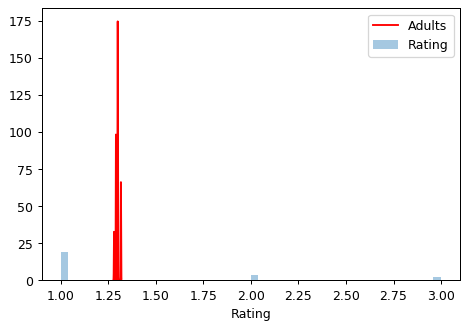

In [36]:


plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Adults, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Adults', 'Rating']);



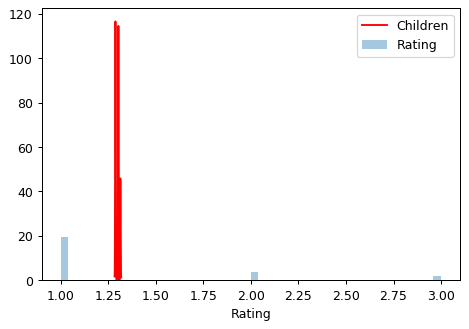

In [38]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["Children"], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Children, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Children', 'Rating']);

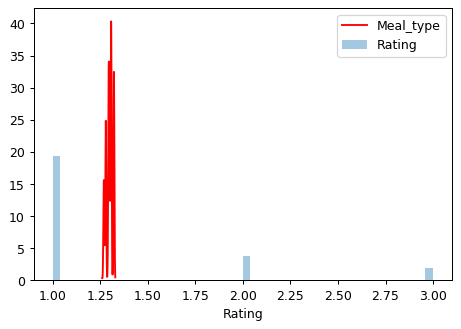

In [42]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["Discount_Rate"], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Discount_Rate, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Meal_type', 'Rating']);

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20624 entries, 0 to 27498
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Reservation-id          20624 non-null  int64  
 1   Gender                  20624 non-null  object 
 2   Age                     20624 non-null  int64  
 3   Ethnicity               20624 non-null  object 
 4   Educational_Level       20624 non-null  object 
 5   Income                  20624 non-null  object 
 6   Country_region          20624 non-null  object 
 7   Hotel_Type              20624 non-null  object 
 8   Expected_checkin        20624 non-null  object 
 9   Expected_checkout       20624 non-null  object 
 10  Booking_date            20624 non-null  object 
 11  Adults                  20624 non-null  int64  
 12  Children                20624 non-null  int64  
 13  Babies                  20624 non-null  float64
 14  Meal_Type               20624 non-null

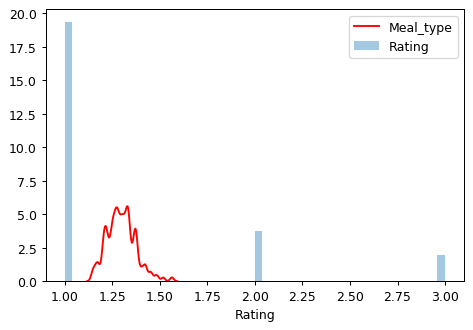

In [43]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["Room_Rate"], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Room_Rate, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Meal_type', 'Rating']);

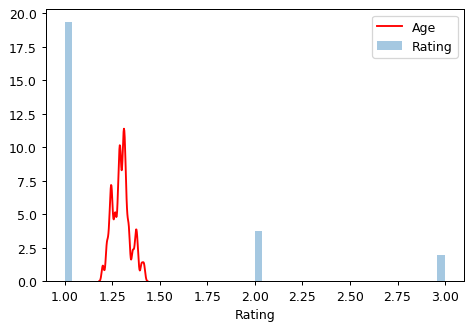

In [46]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=["Age"], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train.Age, color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Age', 'Rating']);

In [47]:
import pandas as pd # import library
import numpy as np # import lib
import statistics as st
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from numpy import linalg as LA
from sklearn import metrics

df=pd.read_csv(r'/home/tharaka/kagglecompetition/data-storm-20/Hotel-A-train.csv' )
dfval = pd.read_csv(r'/home/tharaka/kagglecompetition/data-storm-20/Hotel-A-validation.csv')
# train set

df['Expected_checkin'] = pd.to_datetime(df['Expected_checkin'],infer_datetime_format=True)
df['Expected_checkout'] = pd.to_datetime(df['Expected_checkout'],infer_datetime_format=True)
df['Booking_date'] = pd.to_datetime(df['Booking_date'],infer_datetime_format=True)

df['Days'] = df['Expected_checkout']-df['Booking_date']
df['Days'] = df.Days.dt.days
#dfdf2=df.
df = df.drop(['Reservation-id','Expected_checkin','Expected_checkout','Booking_date'],axis=1)


df.loc[df['Adults']==1,'Adults']='a'
df.loc[df['Adults']==2,'Adults']='b'
df.loc[df['Adults']==3,'Adults']='c'
df.loc[(df['Adults']==4)|(df['Adults']==5) ,'Adults']='d'

df.loc[df['Babies']==0,'Babies']='b1'
df.loc[(df['Babies']==1)|(df['Babies']==2) ,'Babies']='b2'

df.loc[(df['Age']>=18) &(df['Age']<=30),'Age']=0
df.loc[(df['Age']>=31) &(df['Age']<=44),'Age']=1
df.loc[(df['Age']>=45) &(df['Age']<=57),'Age']=2
df.loc[df['Age']>=58,'Age']=3

df.loc[df['Children']==1,'Children']='c1'
df.loc[df['Children']==2,'Children']='c2'
df.loc[df['Children']==3,'Children']='c3'

dfnew=df.drop(['Gender','Ethnicity','Educational_Level','Income','Country_region','Hotel_Type','Visted_Previously','Deposit_type','Booking_channel','Required_Car_Parking','Reservation_Status','Discount_Rate','Room_Rate'],axis=1)


# Validation set
dfval['Expected_checkin'] = pd.to_datetime(dfval['Expected_checkin'],infer_datetime_format=True)
dfval['Expected_checkout'] = pd.to_datetime(dfval['Expected_checkout'],infer_datetime_format=True)
dfval['Booking_date'] = pd.to_datetime(dfval['Booking_date'],infer_datetime_format=True)

dfval['Days'] = dfval['Expected_checkout']-dfval['Booking_date']

dfval = dfval.drop(['Reservation-id','Gender','Expected_checkin','Expected_checkout','Booking_date'],axis=1)


dfval.loc[dfval['Adults']==1,'Adults']='a'
dfval.loc[dfval['Adults']==2,'Adults']='b'
dfval.loc[dfval['Adults']==3,'Adults']='c'
dfval.loc[(dfval['Adults']==4)|(dfval['Adults']==5) ,'Adults']='d'

dfval.loc[dfval['Babies']==0,'Babies']='b1'
dfval.loc[(dfval['Babies']==1) | (dfval['Babies']==2) ,'Babies']='b2'

dfval.loc[(dfval['Age']>=18) &(dfval['Age']<=30),'Age']=0
dfval.loc[(dfval['Age']>=31) &(dfval['Age']<=44),'Age']=1
dfval.loc[(dfval['Age']>=45) &(dfval['Age']<=57),'Age']=2
dfval.loc[dfval['Age']>=58,'Age']=4

dfval.loc[dfval['Children']==1,'Children']='c1'
dfval.loc[dfval['Children']==2,'Children']='c2'
dfval.loc[dfval['Children']==3,'Children']='c3'
dfval['Days'] = dfval.Days.dt.days

dfnewval=dfval.drop(['Ethnicity','Educational_Level','Income','Country_region','Hotel_Type','Visted_Previously','Deposit_type','Booking_channel','Required_Car_Parking','Discount_Rate','Reservation_Status','Room_Rate'],axis=1)
#df['Days'] = df.Arrival_duration.dt.days #####

# Train
X_train = dfnew.copy()
y_train = df.pop('Reservation_Status')
X_valid = dfnewval.copy()
y_valid = dfval.pop('Reservation_Status')

s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

from sklearn.preprocessing import OneHotEncoder
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import AdaBoostClassifier
#model=DecisionTreeClassifier(criterion='entropy',max_depth=1)
#AdaBoost=AdaBoostClassifier(base_estimator=model,n_estimators=400,learning_rate=0.5)

#boostmodel=model.fit(OH_X_train,y_train)
#y_pred=boostmodel.predict(OH_X_valid)
#print(metrics.accuracy_score(y_valid, y_pred))

#from sklearn.svm import SVC
#svclassifier = SVC(kernel='linear')
#svclassifier.fit(OH_X_train, y_train) 

#y_pred = svclassifier.predict(OH_X_valid)

#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_valid,y_pred))
#print(classification_report(y_valid,y_pred))       
#from sklearn.metrics import accuracy_score

#print(accuracy_score(y_valid, y_pred))   
#from sklearn.metrics import f1_score
#print(f1_score(y_valid, y_pred, average='macro'))

#from sklearn.ensemble import RandomForestClassifier

#def run_randomForest(OH_X_train, OH_X_valid, y_train, y_valid):
    #clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
    #clf.fit(OH_X_train, y_train)
   # y_pred = clf.predict(OH_X_valid)
  #  print('Accuracy on test set: ')
 #   print(accuracy_score(y_valid, y_pred))

#run_randomForest(OH_X_train, OH_X_valid, y_train, y_valid)   

from sklearn.preprocessing import StandardScaler 
# create the scaler 
ss = StandardScaler() 
# apply the scaler to the dataframe subset 
wine_subset_scaled = ss.fit_transform(OH_X_train)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(leaf_size=5,n_neighbors =1,p=1) 
model=knn.fit(OH_X_train, y_train)
y_pred=model.predict(OH_X_valid)
print(knn.score(OH_X_valid, y_valid))

from sklearn.model_selection import cross_val_score
# Creating odd list K for KNN
#neighbors = list(range(1,50,2))
# empty list that will hold cv scores
#cv_scores = [ ]
#perform 10-fold cross-validation
#for K in neighbors:
   # knn = KNeighborsClassifier(n_neighbors = K)
  #  scores = cross_val_score(knn,OH_X_train,y_train,cv = 10,scoring ="accuracy")
 #   cv_scores.append(scores.mean())
# Changing to mis classification error
#mse = [1-x for x in cv_scores]
# determing best k
#optimal_k = neighbors[mse.index(min(mse))]
#print("The optimal no. of neighbors is {}".format(optimal_k))
#from sklearn.ensemble import AdaBoostClassifier#List Hyperparameters that we want to tune.
#AdaBoost=AdaBoostClassifier(base_estimator=model,n_estimators=400,learning_rate=1)
#boostmodel=model.fit(OH_X_train,y_train)
#y_pred=boostmodel.predict(OH_X_valid)
#print(metrics.accuracy_score(y_valid, y_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid,y_pred))
print(classification_report(y_valid,y_pred)) 

from sklearn.metrics import f1_score
print(f1_score(y_valid, y_pred, average='macro'))

from sklearn.model_selection import GridSearchCV

#leaf_size = list(range(1,50))
#n_neighbors = list(range(1,50))
#p=[1,2]

#hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#knn_2 = KNeighborsClassifier()

#clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#best_model = clf.fit(OH_X_train,y_train)

#print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
#print('Best p:', best_model.best_estimator_.get_params()['p'])
#print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Categorical variables:
['Adults', 'Children', 'Babies', 'Meal_Type', 'Previous_Cancellations', 'Use_Promotion']
Categorical variables:
['Adults', 'Children', 'Babies', 'Meal_Type', 'Previous_Cancellations', 'Use_Promotion']
0.5070934885412878
[[ 150  528   63]
 [ 265 1211  134]
 [  68  297   33]]
              precision    recall  f1-score   support

    Canceled       0.31      0.20      0.25       741
    Check-In       0.59      0.75      0.66      1610
     No-Show       0.14      0.08      0.11       398

    accuracy                           0.51      2749
   macro avg       0.35      0.35      0.34      2749
weighted avg       0.45      0.51      0.47      2749

0.3381610710303014


In [49]:
OH_X_train['target']=df5['Reservation_Status']

In [51]:
X = OH_X_train.copy()
y = X.pop('target')

X_encode = X.sample(frac=0.25)
y_encode = y[X_encode.index]
X_pretrain = X.drop(X_encode.index)
y_train = y[X_pretrain.index]


In [57]:
OH_X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     27499 non-null  int64  
 1   Days    27499 non-null  int64  
 2   0       27499 non-null  float64
 3   1       27499 non-null  float64
 4   2       27499 non-null  float64
 5   3       27499 non-null  float64
 6   4       27499 non-null  float64
 7   5       27499 non-null  float64
 8   6       27499 non-null  float64
 9   7       27499 non-null  float64
 10  8       27499 non-null  float64
 11  9       27499 non-null  float64
 12  10      27499 non-null  float64
 13  11      27499 non-null  float64
 14  12      27499 non-null  float64
 15  13      27499 non-null  float64
 16  14      27499 non-null  float64
 17  15      27499 non-null  float64
 18  target  27499 non-null  int64  
dtypes: float64(16), int64(3)
memory usage: 4.0 MB


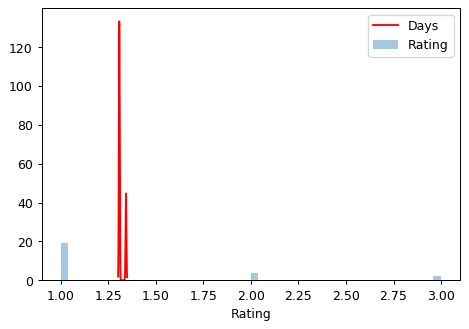

In [60]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=[0], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train[0], color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Days', 'Rating']);

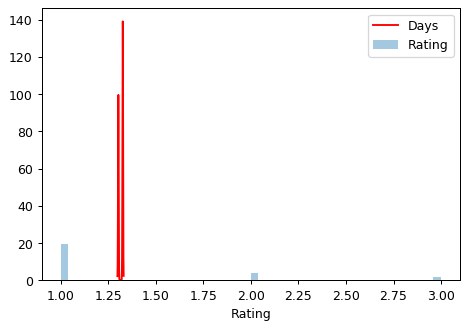

In [61]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=[1], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train[1], color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Days', 'Rating']);

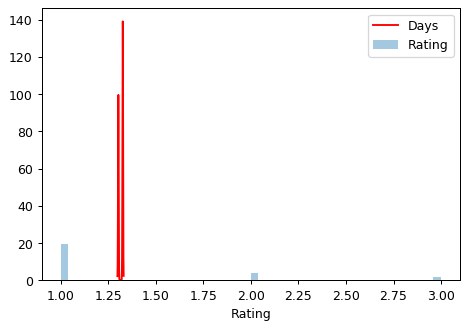

In [64]:
from category_encoders import MEstimateEncoder

# Create the encoder instance. Choose m to control noise.
encoder = MEstimateEncoder(cols=[1], m=5.0)

# Fit the encoder on the encoding split.
encoder.fit(X_encode, y_encode)

# Encode the Zipcode column to create the final training data
X_train = encoder.transform(X_pretrain)

plt.figure(dpi=90)
ax = sns.distplot(y, kde=False, norm_hist=True)
ax = sns.kdeplot(X_train[1], color='r', ax=ax)
ax.set_xlabel("Rating")
ax.legend(labels=['Days', 'Rating']);